In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime


ticker = 'TCS.NS'  
df = yf.download(ticker)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-08-12,38.724998,40.000000,38.724998,39.700001,27.918369,212976
2002-08-13,39.750000,40.387501,38.875000,39.162498,27.540365,153576
2002-08-14,39.250000,39.250000,35.724998,36.462502,25.641647,822776
2002-08-15,36.462502,36.462502,36.462502,36.462502,25.641647,0
2002-08-16,36.275002,38.000000,35.750000,36.375000,25.580111,811856
...,...,...,...,...,...,...
2024-06-14,3889.000000,3889.000000,3828.000000,3832.050049,3832.050049,1860730
2024-06-18,3826.050049,3842.000000,3795.050049,3815.100098,3815.100098,1774045
2024-06-19,3827.649902,3833.850098,3792.949951,3801.699951,3801.699951,1509050


In [2]:
import numpy as np
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(20, len(train_data)):
    x_train.append(train_data[i-20:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 21:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(16))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=11)

[array([0.00100985, 0.00088138, 0.00023603, 0.00023603, 0.00021512,
       0.        , 0.00023603, 0.00066328, 0.00105766, 0.0016313 ,
       0.00159545, 0.00134448, 0.00135344, 0.00135344, 0.00204958,
       0.00215714, 0.00165819, 0.00187928, 0.00181654, 0.00143411])]
[0.0013056394103140492]

[array([0.00100985, 0.00088138, 0.00023603, 0.00023603, 0.00021512,
       0.        , 0.00023603, 0.00066328, 0.00105766, 0.0016313 ,
       0.00159545, 0.00134448, 0.00135344, 0.00135344, 0.00204958,
       0.00215714, 0.00165819, 0.00187928, 0.00181654, 0.00143411]), array([0.00088138, 0.00023603, 0.00023603, 0.00021512, 0.        ,
       0.00023603, 0.00066328, 0.00105766, 0.0016313 , 0.00159545,
       0.00134448, 0.00135344, 0.00135344, 0.00204958, 0.00215714,
       0.00165819, 0.00187928, 0.00181654, 0.00143411, 0.00130564])]
[0.0013056394103140492, 0.0013056394103140492]




Epoch 1/11

5135/5135 [==============================] - 110s 19ms/step - loss: 6.5231e-04
Epoch 2/11
5135/5135 

In [3]:
from  sklearn.metrics import r2_score
test_data = scaled_data[training_data_len - 20: , :]

x_test = []
y_test = scaled_data[training_data_len:, :]
for i in range(20, len(test_data)):
    x_test.append(test_data[i-20:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
r2 = r2_score(y_test,predictions)
r2

9/9 [==============================] - 4s 12ms/step


0.9702773096370434

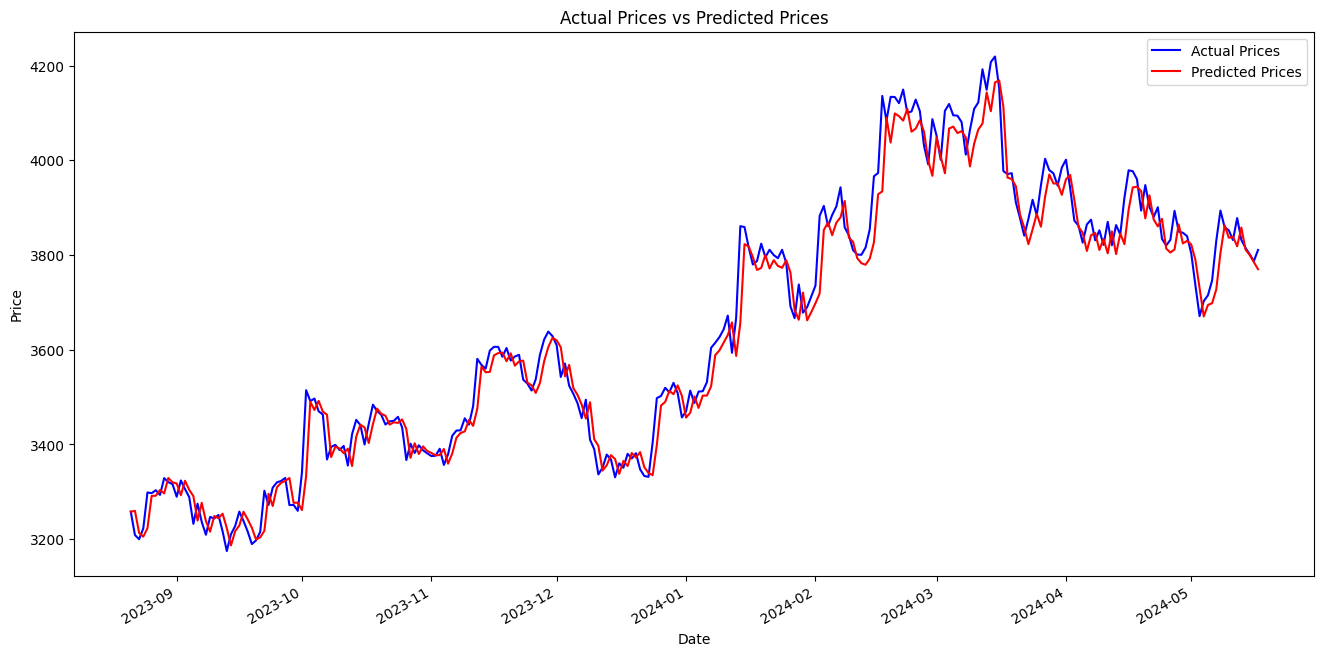

In [4]:
import matplotlib.pyplot as plt
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)
test_dates = pd.date_range(start='2023-08-21', periods=len(y_test), freq='D')

# Plot the data
plt.figure(figsize=(16, 8))
plt.plot(test_dates, y_test, color='blue', label='Actual Prices')
plt.plot(test_dates, predictions, color='red', label='Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.gcf().autofmt_xdate()  # Rotate date labels for better readability
plt.show()

In [5]:
import joblib


model_file_path = '2.joblib'
scaler_file_path = 'scaler2.joblib'

joblib.dump(model, model_file_path)
joblib.dump(scaler, scaler_file_path)

print(f"Model saved to {model_file_path}")
print(f"Scaler saved to {scaler_file_path}")

Model saved to 2.joblib
Scaler saved to scaler2.joblib
